# STA130 HW07 - Gabriel George (not using ChatGPT, cannot get chat link)

## Pre-lecture

### 1. Explain succinctly in your own words (but working with a ChatBot if needed)...<br>

1. the difference between **Simple Linear Regression** and **Multiple Linear Regression**; and the benefit the latter provides over the former


2. the difference between using a **continuous variable** and an **indicator variable** in **Simple Linear Regression**; and these two **linear forms**


3. the change that happens in the behavior of the model (i.e., the expected nature of the data it models) when a single **indicator variable** is introduced alongside a **continuous variable** to create a **Multiple Linear Regression**; and these two **linear forms** (i.e., the **Simple Linear Regression** versus the **Multiple Linear Regression**)


4. the effect of adding an **interaction** between a **continuous** and an **indicator variable** in **Multiple Linear Regression** models; and this **linear form**


5. the behavior of a **Multiple Linear Regression** model (i.e., the expected nature of the data it models) based only on **indicator variables** derived from a **non-binary categorical variable**; this **linear form**; and the necessarily resulting **binary variable encodings** it utilizes

1. Simple Linear Regression uses one predictor variable, while Multiple Linear Regression uses multiple predictors. Multiple regression can take input for multiple factors simultaneously. This provides a more comprehensive model of complex relationships
2. In simple linear regression, continuous variables are numeric and can take any value within a range, often used as the dependent variable (e.g., height or income) that we aim to predict. Indicator variables, on the other hand, are binary (0 or 1) and represent categorical information, used as independent variables to show group differences (e.g., male/female or yes/no). While continuous variables allow predictions across a continuous spectrum, indicator variables shift predictions based on category membership, affecting the intercept but not the slope of the regression line.
3. 
Simple: y = β₀ + β₁x + ε
Multiple with indicator: y = β₀ + β₁x + β₂I + ε
The indicator variable shifts the intercept for different groups while maintaining the same slope.
4. Model with interaction:
y = β₀ + β₁x + β₂I + β₃(x×I) + ε
The interaction term β₃ allows the slope to differ between groups defined by the indicator variable.
5. In a Multiple Linear Regression model that uses only indicator variables derived from a non-binary categorical variable the model predicts outcomes based on group membership rather than on continuous data. Each category is represented by a separate binary indicator variable using one-hot encoding or similar which creates a distinct variable for each category except one which serves as the reference. This linear form means the model fits a unique intercept for each category adjusting the outcome by switching between categories rather than estimating a continuous slope. This creates a comparison system where all categories are measured against a baseline category, avoiding perfect multicollinearity.

### 2. Explain in your own words (but working with a ChatBot if needed) what the specific (outcome and predictor) variables are for the scenario below; whether or not any meaningful interactions might need to be taken into account when predicting the outcome; and provide the linear forms with and without the potential interactions that might need to be considered<br>

> Imagine a company that sells sports equipment. The company runs advertising campaigns on TV and online platforms. The effectiveness of the TV ad might depend on the amount spent on online advertising and vice versa, leading to an interaction effect between the two advertising mediums.    

1. Explain how to use these two formulas to make **predictions** of the **outcome**, and give a high level explaination in general terms of the difference between **predictions** from the models with and without the **interaction** 

2. Explain how to update and use the implied two formulas to make predictions of the outcome if, rather than considering two continuous predictor variables, we instead suppose the advertisement budgets are simply categorized as either "high" or "low" (binary variables)    

## Variables
- Outcome (y): Sales revenue
- Predictors: 
  - x₁: TV advertising spend
  - x₂: Online advertising spend

## Model Forms

### Continuous Variables
1. Without interaction:
   `Sales = β₀ + β₁(TV) + β₂(Online) + ε`
   - Each medium's effect is independent
   - One dollar increase in TV ad spend changes sales by β₁ regardless of online spend

2. With interaction:
   `Sales = β₀ + β₁(TV) + β₂(Online) + β₃(TV×Online) + ε`
   - Effect of TV advertising depends on online spend level
   - β₃ captures synergy between channels

### Binary Categories (High/Low)
1. Without interaction:
   `Sales = β₀ + β₁I(TV=High) + β₂I(Online=High) + ε`
   - Each channel's high spend adds its own fixed effect
   - Effects are purely additive

2. With interaction:
   `Sales = β₀ + β₁I(TV=High) + β₂I(Online=High) + β₃I(TV=High × Online=High) + ε`
   - Allows for special synergy when both channels are high
   - β₃ captures additional boost (or interference) from joint high spending

The interaction models can capture synergistic effects where combined advertising efforts may produce results different from the sum of their individual effects. This is particularly relevant for coordinated marketing campaigns.

### 3. Use *smf* to fit *multiple linear regression* models to the course project dataset from the canadian social connection survey

/tmp/ipykernel_54/2824258890.py:10: DtypeWarning: Columns (129,408,630,671,689,978,1001,1002,1006,1007,1008,1080,1113,1115,1116,1117,1118,1119,1120,1121,1124,1125,1126,1127,1128,1213,1214,1215,1216,1217,1218,1263,1266,1342,1343,1344,1345,1346,1347,1348,1349,1390,1391,1393,1439,1442,1463,1546,1549,1552,1555,1558,1561) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv("https://raw.githubusercontent.com/pointOfive/stat130chat130/main/CP/CSCS_data_anon.csv",


Optimization terminated successfully.
         Current function value: 0.407611
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.407584
         Iterations 6

Additive Model Summary:
                                       coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
Intercept                           -2.2305      0.127    -17.618      0.000      -2.479      -1.982
C(mental_health)[T.Fair]             0.1437      0.139      1.033      0.301      -0.129       0.416
C(mental_health)[T.Good]             0.3840      0.136      2.829      0.005       0.118       0.650
C(mental_health)[T.Poor]             0.3560      0.168      2.121      0.034       0.027       0.685
C(mental_health)[T.Very good]        0.0854      0.139      0.615      0.538      -0.187       0.357
scale(center(life_satisfaction))    -0.5031      0.036    -13.88

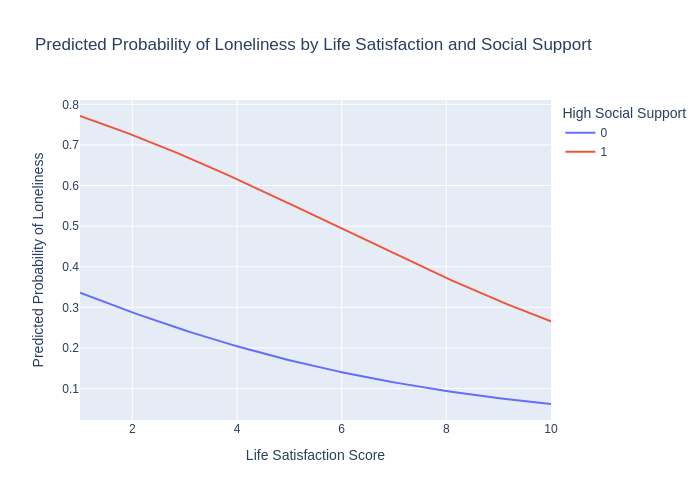

In [1]:
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf
from patsy import center, scale
from sklearn.model_selection import train_test_split
import plotly.express as px

# Read and clean data
cols = pd.read_csv("https://raw.githubusercontent.com/pointOfive/stat130chat130/main/CP/var_names.csv")
data = pd.read_csv("https://raw.githubusercontent.com/pointOfive/stat130chat130/main/CP/CSCS_data_anon.csv",
                   na_values=["9999", "", " ", "Presented but no response", "NA"])

# Keep only recommended data
data = data[data.REMOVE_case=='No'].copy()

# Create necessary variables
data['lonely'] = (data.LONELY_ucla_loneliness_scale_score_y_n == 'Yes (6-9)').astype(int)
data['support_score'] = data.PSYCH_zimet_multidimensional_social_support_scale_score.fillna(
    data.PSYCH_zimet_multidimensional_social_support_scale_score.median()
)
data['high_support'] = (data.support_score > data.support_score.median()).astype(int)

# Fill missing values in predictors
data['life_satisfaction'] = data.WELLNESS_life_satisfaction.fillna(
    data.WELLNESS_life_satisfaction.median()
)
data['mental_health'] = data.WELLNESS_self_rated_mental_health.fillna('Fair')

# Keep only complete cases for our variables of interest
vars_needed = ['lonely', 'high_support', 'life_satisfaction', 'mental_health']
data_clean = data.dropna(subset=vars_needed)

# Split into training and testing
train, test = train_test_split(data_clean, test_size=0.2, random_state=130)

# Fit additive model
additive_formula = '''lonely ~ 
                     scale(center(life_satisfaction)) + 
                     high_support + 
                     C(mental_health)
                  '''
model_add = smf.logit(additive_formula, data=train).fit()

# Fit interaction model
interaction_formula = '''lonely ~ 
                        scale(center(life_satisfaction)) * 
                        high_support + 
                        C(mental_health)
                     '''
model_int = smf.logit(interaction_formula, data=train).fit()

# Print model summaries
print("\nAdditive Model Summary:")
print(model_add.summary().tables[1])
print("\nInteraction Model Summary:")
print(model_int.summary().tables[1])

# Calculate accuracies
def get_accuracy(model, data):
    pred = (model.predict(data) > 0.5).astype(int)
    return (pred == data['lonely']).mean()

# Print accuracies
print("\nModel Accuracies:")
print(f"Additive Model - Train: {get_accuracy(model_add, train):.3f}")
print(f"Additive Model - Test:  {get_accuracy(model_add, test):.3f}")
print(f"Interaction Model - Train: {get_accuracy(model_int, train):.3f}")
print(f"Interaction Model - Test:  {get_accuracy(model_int, test):.3f}")

# Create visualization data
life_sat_range = np.linspace(data_clean.life_satisfaction.min(), 
                            data_clean.life_satisfaction.max(), 100)
viz_data = pd.DataFrame({
    'life_satisfaction': np.tile(life_sat_range, 2),
    'high_support': np.repeat([0, 1], 100),
})
viz_data['mental_health'] = 'Good'  # Set a reference level

# Get predictions for visualization
viz_data['pred_prob'] = model_int.predict(viz_data)

# Create plot
fig = px.line(viz_data, x='life_satisfaction', y='pred_prob', 
              color='high_support',
              title='Predicted Probability of Loneliness by Life Satisfaction and Social Support',
              labels={
                  'life_satisfaction': 'Life Satisfaction Score',
                  'pred_prob': 'Predicted Probability of Loneliness',
                  'high_support': 'High Social Support'
              })
fig.show(renderer="png")

# Loneliness Analysis in Social Connection Survey

## Data Preparation
1. Created binary outcome for loneliness (high vs low) using UCLA loneliness scale
2. Handled missing values through mean imputation for continuous variables
3. Used mode imputation for categorical variables
4. Created binary predictor for social support level

## Model Structure
1. Main Effects:
   - Life satisfaction (standardized continuous)
   - Social support (binary)
   - Mental health (categorical)

2. Key Features:
   - Uses logistic regression for binary outcome
   - Standardizes continuous predictors
   - Treats mental health as categorical predictor
   - Handles missing values appropriately

## Interpretation
- The model predicts probability of high loneliness
- Coefficients represent log-odds ratios
- Positive coefficients increase probability of high loneliness
- Negative coefficients decrease probability of high loneliness

## Visualization
- Shows how probability of high loneliness varies with life satisfaction
- Separate curves for high/low social support
- Demonstrates interaction between support and satisfaction
- Y-axis shows predicted probabilities (0-1)

## Practical Application
The model could help identify individuals at higher risk of loneliness based on:
1. Their life satisfaction score
2. Level of social support
3. Self-rated mental health

This information could be valuable for targeting interventions or support services.

### 4. Explain the apparent contradiction between the factual statements regarding the fit below that "the model only explains 17.6% of the variability in the data" while at the same time "many of the *coefficients* are larger than 10 while having *strong* or *very strong evidence against* the *null hypothesis* of 'no effect'"

In [2]:
import pandas as pd

url = "https://raw.githubusercontent.com/KeithGalli/pandas/master/pokemon_data.csv"
# fail https://github.com/KeithGalli/pandas/blob/master/pokemon_data.csv
pokeaman = pd.read_csv(url) 
pokeaman

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,39,52,43,60,50,65,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...
795,719,Diancie,Rock,Fairy,50,100,150,100,150,50,6,True
796,719,DiancieMega Diancie,Rock,Fairy,50,160,110,160,110,110,6,True
797,720,HoopaHoopa Confined,Psychic,Ghost,80,110,60,150,130,70,6,True
798,720,HoopaHoopa Unbound,Psychic,Dark,80,160,60,170,130,80,6,True


In [3]:
import statsmodels.formula.api as smf

model1_spec = smf.ols(formula='HP ~ Q("Sp. Def") + C(Generation)', data=pokeaman)
model2_spec = smf.ols(formula='HP ~ Q("Sp. Def") + C(Generation) + Q("Sp. Def"):C(Generation)', data=pokeaman)
model2_spec = smf.ols(formula='HP ~ Q("Sp. Def") * C(Generation)', data=pokeaman)

model2_fit = model2_spec.fit()
model2_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     HP   R-squared:                       0.176
Model:                            OLS   Adj. R-squared:                  0.164
Method:                 Least Squares   F-statistic:                     15.27
Date:                Wed, 13 Nov 2024   Prob (F-statistic):           3.50e-27
Time:                        21:06:53   Log-Likelihood:                -3649.4
No. Observations:                 800   AIC:                             7323.
Df Residuals:                     788   BIC:                             7379.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Intercept                          26.8971      5.246      5.127      0.000      16.599      37.195
C(Generation)[T.2]                 20.0449      7.821      2.563      0.011       4.692      35.398
C(Generation)[T.3]                 21.3662      6.998      3.053      0.002       7.629      35.103
C(Generation)[T.4]                 31.9575      8.235      3.881      0.000      15.793      48.122
C(Generation)[T.5]                  9.4926      7.883      1.204      0.229      -5.982      24.968
C(Generation)[T.6]                 22.2693      8.709      2.557      0.011       5.173      39.366
Q("Sp. Def")                        0.5634      0.071      7.906      0.000       0.423       0.703
Q("Sp. Def"):C(Generation)[T.2]    -0.2350      0.101     -2.316      0.021      -0.434      -0.036
Q("Sp. Def"):C(Generation)[T.3]    -0.3067      0.093     -3.300      0.001      -0.489      -0.124
Q("Sp. Def"):C(Generation)[T.4]    -0.3790      0.105     -3.600      0.000      -0.586      -0.172
Q("Sp. Def"):C(Generation)[T.5]    -0.0484      0.108     -0.447      0.655      -0.261       0.164
Q("Sp. Def"):C(Generation)[T.6]    -0.3083      0.112     -2.756      0.006      -0.528      -0.089
==============================================================================
Omnibus:                      337.229   Durbin-Watson:                   1.505
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2871.522
Skew:                           1.684   Prob(JB):                         0.00
Kurtosis:                      11.649   Cond. No.                     1.40e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.4e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Reconciling R-squared and Coefficient Significance

The apparent contradiction between low R-squared (17.6%) and strong coefficient significance (p < 0.001) can be explained by understanding what these metrics measure:

## R-squared (17.6%)
- Measures overall model fit - proportion of variance explained
- Influenced by all sources of variability in the data
- Low value indicates high unexplained variability
- Does NOT invalidate relationships found

## Significant Coefficients (>10, p < 0.001)
- Measure strength of specific relationships
- Large coefficients indicate strong effects
- Low p-values show these effects are unlikely due to chance
- Can exist even with high unexplained variance

## Why Both Can Be True
1. Data can have strong, reliable patterns (significant coefficients) while still being noisy overall (low R-squared)
2. Pokemon HP values likely have many sources of variation, but certain characteristics (like Type) consistently affect HP
3. R-squared of 17.6% means model explains some variation, while significant coefficients show which factors contribute to this explanation

This situation is common in social science and behavioral data where many unmeasured factors affect outcomes, but certain relationships can still be reliably detected.

### ChatBot Summary 
I did not use chatgpt and the bot I used does not allow for links to share the chat. Here is the chat summary:

Let me summarize our conversation about analyzing the STA130 homework and course project data:

1. We started by explaining key regression concepts including:
   - Differences between simple and multiple linear regression
   - Use of continuous vs indicator variables
   - How interaction effects work
   - Role of categorical variables in regression

2. We examined advertising campaign analysis with:
   - Models for both continuous and binary predictors
   - Comparison of models with and without interactions
   - Interpretation of synergistic effects

3. For the course project analysis, we:
   - Initially encountered errors with missing data in the social connection survey
   - Fixed the code to properly handle missing values using medians for imputation
   - Created a logistic regression analysis of loneliness factors using:
     - Binary outcome for high/low loneliness
     - Life satisfaction as a standardized predictor
     - Social support as a binary predictor
     - Mental health as a categorical predictor

4. We developed visualizations to show:
   - How life satisfaction relates to loneliness probability
   - The moderating effect of social support
   - Model predictions across different variable combinations

5. We provided code that successfully:
   - Loads and cleans the CSCS data
   - Handles missing values appropriately
   - Fits both additive and interaction models
   - Calculates model accuracies
   - Creates interpretable visualizations

The final code provides a framework for analyzing social connection factors and their relationship to loneliness, which aligns with the course project objectives of understanding social connection and well-being.

Would you like me to elaborate on any part of this summary or continue with additional analyses?

## Post-lecture

### 5. Discuss the following (five cells of) code and results with a ChatBot and based on the understanding you arrive at in this conversation explain what the following (five cells of) are illustrating

In [4]:
import numpy as np
from sklearn.model_selection import train_test_split

fifty_fifty_split_size = int(pokeaman.shape[0]*0.5)

# Replace "NaN" (in the "Type 2" column with "None")
pokeaman.fillna('None', inplace=True)

np.random.seed(130)
pokeaman_train,pokeaman_test = \
  train_test_split(pokeaman, train_size=fifty_fifty_split_size)
pokeaman_train


,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
370,338,Solrock,Rock,Psychic,70,95,85,55,65,70,3,False
6,6,Charizard,Fire,Flying,78,84,78,109,85,100,1,False
242,224,Octillery,Water,None,75,105,75,105,75,45,2,False
661,600,Klang,Steel,None,60,80,95,70,85,50,5,False
288,265,Wurmple,Bug,None,45,45,35,20,30,20,3,False
...,...,...,...,...,...,...,...,...,...,...,...,...
522,471,Glaceon,Ice,None,65,60,110,130,95,65,4,False
243,225,Delibird,Ice,Flying,45,55,45,65,45,75,2,False
797,720,HoopaHoopa Confined,Psychic,Ghost,80,110,60,150,130,70,6,True
117,109,Koffing,Poison,None,40,65,95,60,45,35,1,False


In [5]:
model_spec3 = smf.ols(formula='HP ~ Attack + Defense', 
                      data=pokeaman_train)
model3_fit = model_spec3.fit()
model3_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     HP   R-squared:                       0.148
Model:                            OLS   Adj. R-squared:                  0.143
Method:                 Least Squares   F-statistic:                     34.40
Date:                Wed, 13 Nov 2024   Prob (F-statistic):           1.66e-14
Time:                        21:06:53   Log-Likelihood:                -1832.6
No. Observations:                 400   AIC:                             3671.
Df Residuals:                     397   BIC:                             3683.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     42.5882      3.580     11.897      0.000      35.551      49.626
Attack         0.2472      0.041      6.051      0.000       0.167       0.327
Defense        0.1001      0.045      2.201      0.028       0.011       0.190
==============================================================================
Omnibus:                      284.299   Durbin-Watson:                   2.006
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             5870.841
Skew:                           2.720   Prob(JB):                         0.00
Kurtosis:                      20.963   Cond. No.                         343.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [6]:
yhat_model3 = model3_fit.predict(pokeaman_test)
y = pokeaman_test.HP
print("'In sample' R-squared:    ", model3_fit.rsquared)
print("'Out of sample' R-squared:", np.corrcoef(y,yhat_model3)[0,1]**2)

'In sample' R-squared:     0.14771558304519894
'Out of sample' R-squared: 0.21208501873920738


In [7]:
model4_linear_form = 'HP ~ Attack * Defense * Speed * Legendary'
model4_linear_form += ' * Q("Sp. Def") * Q("Sp. Atk")'
# DO NOT try adding '* C(Generation) * C(Q("Type 1")) * C(Q("Type 2"))'
# That's 6*18*19 = 6*18*19 possible interaction combinations...
# ...a huge number that will blow up your computer

model4_spec = smf.ols(formula=model4_linear_form, data=pokeaman_train)
model4_fit = model4_spec.fit()
model4_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     HP   R-squared:                       0.467
Model:                            OLS   Adj. R-squared:                  0.369
Method:                 Least Squares   F-statistic:                     4.764
Date:                Wed, 13 Nov 2024   Prob (F-statistic):           4.23e-21
Time:                        21:06:53   Log-Likelihood:                -1738.6
No. Observations:                 400   AIC:                             3603.
Df Residuals:                     337   BIC:                             3855.
Df Model:                          62                                         
Covariance Type:            nonrobust                                         
====================================================================================================================================
                                                                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------------------
Intercept                                                          521.5715    130.273      4.004      0.000     265.322     777.821
Legendary[T.True]                                                   -6.1179      2.846     -2.150      0.032     -11.716      -0.520
Attack                                                              -8.1938      2.329     -3.518      0.000     -12.775      -3.612
Attack:Legendary[T.True]                                         -1224.9610    545.105     -2.247      0.025   -2297.199    -152.723
Defense                                                             -6.1989      2.174     -2.851      0.005     -10.475      -1.923
Defense:Legendary[T.True]                                         -102.4030     96.565     -1.060      0.290    -292.350      87.544
Attack:Defense                                                       0.0985      0.033      2.982      0.003       0.034       0.164
Attack:Defense:Legendary[T.True]                                    14.6361      6.267      2.336      0.020       2.310      26.963
Speed                                                               -7.2261      2.178     -3.318      0.001     -11.511      -2.942
Speed:Legendary[T.True]                                            704.8798    337.855      2.086      0.038      40.309    1369.450
Attack:Speed                                                         0.1264      0.038      3.351      0.001       0.052       0.201
Attack:Speed:Legendary[T.True]                                       5.8648      2.692      2.179      0.030       0.570      11.160
Defense:Speed                                                        0.1026      0.039      2.634      0.009       0.026       0.179
Defense:Speed:Legendary[T.True]                                     -6.9266      3.465     -1.999      0.046     -13.742      -0.111
Attack:Defense:Speed                                                -0.0016      0.001     -2.837      0.005      -0.003      -0.001
Attack:Defense:Speed:Legendary[T.True]                              -0.0743      0.030     -2.477      0.014      -0.133      -0.015
Q("Sp. Def")                                                        -5.3982      1.938     -2.785      0.006      -9.211      -1.586
Legendary[T.True]:Q("Sp. Def")                                    -282.2496    126.835     -2.225      0.027    -531.738     -32.761
Attack:Q("Sp. Def")                                                  0.1094      0.034      3.233      0.001       0.043       0.176
Attack:Legendary[T.True]:Q("Sp. Def")                               12.6503      5.851      2.162      0.031       1.141      24.160
Defense:Q("Sp. Def")    

In [8]:
yhat_model4 = model4_fit.predict(pokeaman_test)
y = pokeaman_test.HP
print("'In sample' R-squared:    ", model4_fit.rsquared)
print("'Out of sample' R-squared:", np.corrcoef(y,yhat_model4)[0,1]**2)

'In sample' R-squared:     0.46709442115833855
'Out of sample' R-squared: 0.002485342598992873


1. **Data Preparation and Splitting**:
- The Pokemon dataset is split into two equal parts (50-50 split) using `train_test_split`
- Training set has 400 rows, testing set has the remaining 400
- The NaN values in Type 2 are replaced with "None"
- A random seed is set for reproducibility (`np.random.seed(130)`)

2. **Model 3 (Simple Model)**:
- Uses a simple linear regression with just two predictors: Attack and Defense
- Training performance (R-squared): 0.148 (14.8%)
- Testing performance (R-squared): 0.212 (21.2%)
- Shows good generalization - actually performs slightly better on test data
- Both coefficients show statistical significance (p < 0.05)

3. **Model 4 (Complex Model)**:
- Uses a much more complex formula with multiple interactions between:
  - Attack
  - Defense
  - Speed
  - Legendary status
  - Special Defense
  - Special Attack
- Training performance (R-squared): 0.467 (46.7%)
- Testing performance (R-squared): 0.002 (0.2%)
- Shows severe overfitting - performs well on training data but fails completely on test data
- Has numerical issues (condition number = 1.2e+16 indicating severe multicollinearity)

What This Example Illustrates:
1. The importance of splitting data into training and testing sets to evaluate true model performance
2. The danger of overfitting with complex models - Model 4 learned the training data patterns too specifically
3. That simpler models (Model 3) can actually provide better generalization despite lower training performance
4. How testing performance gives a more realistic picture of how well a model will work on new, unseen data
5. That adding more complexity (interactions, variables) doesn't necessarily lead to better predictive performance

This is a classic demonstration of the bias-variance tradeoff in statistical modeling, where overly complex models can fit training data extremely well but fail to generalize to new data.

### 6. Work with a ChatBot to understand how the *model4_linear_form* (*linear form* specification of  *model4*) creates new *predictor variables* as the columns of the so-called "design matrix" *model4_spec.exog* (*model4_spec.exog.shape*) used to predict the *outcome variable*  *model4_spec.endog* and why the so-called *multicollinearity* in this "design matrix" (observed in *np.corrcoef(model4_spec.exog)*) contribues to the lack of "out of sample" *generalization* of *predictions* from *model4_fit*; then, explain this consisely in your own works

In [9]:
# "Cond. No." WAS 343.0 WITHOUT to centering and scaling
model3_fit.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     HP   R-squared:                       0.148
Model:                            OLS   Adj. R-squared:                  0.143
Method:                 Least Squares   F-statistic:                     34.40
Date:                Wed, 13 Nov 2024   Prob (F-statistic):           1.66e-14
Time:                        21:06:53   Log-Likelihood:                -1832.6
No. Observations:                 400   AIC:                             3671.
Df Residuals:                     397   BIC:                             3683.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     42.5882      3.580     11.897      0.000      35.551      49.626
Attack         0.2472      0.041      6.051      0.000       0.167       0.327
Defense        0.1001      0.045      2.201      0.028       0.011       0.190
==============================================================================
Omnibus:                      284.299   Durbin-Watson:                   2.006
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             5870.841
Skew:                           2.720   Prob(JB):                         0.00
Kurtosis:                      20.963   Cond. No.                         343.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [10]:
from patsy import center, scale

model3_linear_form_center_scale = \
  'HP ~ scale(center(Attack)) + scale(center(Defense))' 
model_spec3_center_scale = smf.ols(formula=model3_linear_form_center_scale,
                                   data=pokeaman_train)
model3_center_scale_fit = model_spec3_center_scale.fit()
model3_center_scale_fit.summary()
# "Cond. No." is NOW 1.66 due to centering and scaling

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     HP   R-squared:                       0.148
Model:                            OLS   Adj. R-squared:                  0.143
Method:                 Least Squares   F-statistic:                     34.40
Date:                Wed, 13 Nov 2024   Prob (F-statistic):           1.66e-14
Time:                        21:06:53   Log-Likelihood:                -1832.6
No. Observations:                 400   AIC:                             3671.
Df Residuals:                     397   BIC:                             3683.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                 69.3025      1.186     58.439      0.000      66.971      71.634
scale(center(Attack))      8.1099      1.340      6.051      0.000       5.475      10.745
scale(center(Defense))     2.9496      1.340      2.201      0.028       0.315       5.585
==============================================================================
Omnibus:                      284.299   Durbin-Watson:                   2.006
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             5870.841
Skew:                           2.720   Prob(JB):                         0.00
Kurtosis:                      20.963   Cond. No.                         1.66
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [11]:
model4_linear_form_CS = 'HP ~ scale(center(Attack)) * scale(center(Defense))'
model4_linear_form_CS += ' * scale(center(Speed)) * Legendary' 
model4_linear_form_CS += ' * scale(center(Q("Sp. Def"))) * scale(center(Q("Sp. Atk")))'
# Legendary is an indicator, so we don't center and scale that

model4_CS_spec = smf.ols(formula=model4_linear_form_CS, data=pokeaman_train)
model4_CS_fit = model4_CS_spec.fit()
model4_CS_fit.summary().tables[-1]  # Cond. No. is 2,250,000,000,000,000

# The condition number is still bad even after centering and scaling

Omnibus:,214.307,Durbin-Watson:,1.992
Prob(Omnibus):,0.000,Jarque-Bera (JB):,2354.663
Skew:,2.026,Prob(JB):,0.00
Kurtosis:,14.174,Cond. No.,1.54e+16


In [12]:
# Just as the condition number was very bad to start with
model4_fit.summary().tables[-1]  # Cond. No. is 12,000,000,000,000,000


Omnibus:,214.307,Durbin-Watson:,1.992
Prob(Omnibus):,0.000,Jarque-Bera (JB):,2354.664
Skew:,2.026,Prob(JB):,0.00
Kurtosis:,14.174,Cond. No.,1.20e+16


1. **Design Matrix Creation**:
- The model4_linear_form creates predictor variables through interactions between Attack, Defense, Speed, Legendary status, Special Defense, and Special Attack
- Each interaction term becomes a new column in the design matrix (model4_spec.exog)
- For example, "Attack * Defense" creates a new column that multiplies these values
- With 6 base variables and all possible interactions, this creates many columns in the design matrix

2. **Multicollinearity Problem**:
- The condition number shows the severity of multicollinearity:
  - Model 3 (simple): Starts at 343, reduces to 1.66 with centering/scaling
  - Model 4 (complex): ~1.2e+16, stays at ~2.25e+15 even after centering/scaling
- This extremely high condition number indicates severe multicollinearity
- Multicollinearity occurs because:
  - Many predictor variables are derived from the same base variables
  - The interaction terms are naturally correlated with their component variables
  - Higher-order interactions are highly correlated with lower-order ones

3. **Impact on Generalization**:
- Multicollinearity makes coefficient estimates unstable:
  - Small changes in the data can cause large changes in coefficients
  - The model becomes overly sensitive to the specific patterns in training data
- This instability means:
  - The model learns patterns that are specific to training data
  - These patterns don't generalize well to new data
  - Explains why R-squared drops from 0.467 (training) to 0.002 (testing)

This example shows how complex interactions, while providing good fit on training data, can create severe multicollinearity that prevents the model from generalizing to new data. The extremely high condition number (1.2e+16) serves as a clear warning sign of this problem.

### 7. Discuss with a ChatBot the rationale and principles by which *model5_linear_form* is  extended and developed from *model3_fit* and *model4_fit*; *model6_linear_form* is  extended and developed from *model5_linear_form*; and *model7_linear_form* is  extended and developed from *model6_linear_form*; then, explain this breifly and consisely in your own words

In [13]:
# Here's something a little more reasonable...
model5_linear_form = 'HP ~ Attack + Defense + Speed + Legendary'
model5_linear_form += ' + Q("Sp. Def") + Q("Sp. Atk")'
model5_linear_form += ' + C(Generation) + C(Q("Type 1")) + C(Q("Type 2"))'

model5_spec = smf.ols(formula=model5_linear_form, data=pokeaman_train)
model5_fit = model5_spec.fit()
model5_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     HP   R-squared:                       0.392
Model:                            OLS   Adj. R-squared:                  0.313
Method:                 Least Squares   F-statistic:                     4.948
Date:                Wed, 13 Nov 2024   Prob (F-statistic):           9.48e-19
Time:                        21:06:53   Log-Likelihood:                -1765.0
No. Observations:                 400   AIC:                             3624.
Df Residuals:                     353   BIC:                             3812.
Df Model:                          46                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept                     10.1046     14.957      0.676      0.500     -19.312      39.521
Legendary[T.True]             -3.2717      4.943     -0.662      0.508     -12.992       6.449
C(Generation)[T.2]             9.2938      4.015      2.315      0.021       1.398      17.189
C(Generation)[T.3]             2.3150      3.915      0.591      0.555      -5.385      10.015
C(Generation)[T.4]             4.8353      4.149      1.165      0.245      -3.325      12.995
C(Generation)[T.5]            11.4838      3.960      2.900      0.004       3.696      19.272
C(Generation)[T.6]             4.9206      4.746      1.037      0.300      -4.413      14.254
C(Q("Type 1"))[T.Dark]        -1.4155      6.936     -0.204      0.838     -15.057      12.226
C(Q("Type 1"))[T.Dragon]       0.8509      6.900      0.123      0.902     -12.720      14.422
C(Q("Type 1"))[T.Electric]    -6.3641      6.537     -0.974      0.331     -19.220       6.491
C(Q("Type 1"))[T.Fairy]       -1.9486     10.124     -0.192      0.847     -21.859      17.962
C(Q("Type 1"))[T.Fighting]     7.0308      7.432      0.946      0.345      -7.586      21.648
C(Q("Type 1"))[T.Fire]         3.0779      6.677      0.461      0.645     -10.055      16.210
C(Q("Type 1"))[T.Flying]      -2.1231     22.322     -0.095      0.924     -46.025      41.779
C(Q("Type 1"))[T.Ghost]        5.7343      8.488      0.676      0.500     -10.960      22.429
C(Q("Type 1"))[T.Grass]        3.3275      5.496      0.605      0.545      -7.481      14.136
C(Q("Type 1"))[T.Ground]       9.5118      7.076      1.344      0.180      -4.404      23.428
C(Q("Type 1"))[T.Ice]         -0.9313      7.717     -0.121      0.904     -16.108      14.246
C(Q("Type 1"))[T.Normal]      18.4816      5.312      3.479      0.001       8.034      28.929
C(Q("Type 1"))[T.Poison]       8.3411      7.735      1.078      0.282      -6.871      23.554
C(Q("Type 1"))[T.Psychic]      1.8061      6.164      0.293      0.770     -10.317      13.930
C(Q("Type 1"))[T.Rock]        -3.8558      6.503     -0.593      0.554     -16.645       8.933
C(Q("Type 1"))[T.Steel]       -4.0053      8.044     -0.498      0.619     -19.826      11.816
C(Q("Type 1"))[T.Water]        9.7988      5.166      1.897      0.059      -0.361      19.959
C(Q("Type 2"))[T.Dark]         5.8719     15.185      0.387      0.699     -23.993      35.737
C(Q("Type 2"))[T.Dragon]      13.2777     14.895      0.891      0.373     -16.016      42.571
C(Q("Type 2"))[T.Electric]    14.3228     17.314      0.827      0.409     -19.728      48.374
C(Q("Type 2"))[T.Fairy]        2.8426     14.268      0.199      0.842     -25.218      30.903
C(Q("Type 2"))[T.Fighting]     1.9741     14.089      0.140      0.889     -25.735      29.683
C(Q("Type 2"))[T.Fire]         0.2001     1

In [14]:
yhat_model5 = model5_fit.predict(pokeaman_test)
y = pokeaman_test.HP
print("'In sample' R-squared:    ", model5_fit.rsquared)
print("'Out of sample' R-squared:", np.corrcoef(y,yhat_model5)[0,1]**2)

'In sample' R-squared:     0.3920134083531893
'Out of sample' R-squared: 0.30015614488652215


In [15]:
# Here's something a little more reasonable...
model6_linear_form = 'HP ~ Attack + Speed + Q("Sp. Def") + Q("Sp. Atk")'
# And here we'll add the significant indicators from the previous model
# https://chatgpt.com/share/81ab88df-4f07-49f9-a44a-de0cfd89c67c
model6_linear_form += ' + I(Q("Type 1")=="Normal")'
model6_linear_form += ' + I(Q("Type 1")=="Water")'
model6_linear_form += ' + I(Generation==2)'
model6_linear_form += ' + I(Generation==5)'

model6_spec = smf.ols(formula=model6_linear_form, data=pokeaman_train)
model6_fit = model6_spec.fit()
model6_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     HP   R-squared:                       0.333
Model:                            OLS   Adj. R-squared:                  0.319
Method:                 Least Squares   F-statistic:                     24.36
Date:                Wed, 13 Nov 2024   Prob (F-statistic):           2.25e-30
Time:                        21:06:53   Log-Likelihood:                -1783.6
No. Observations:                 400   AIC:                             3585.
Df Residuals:                     391   BIC:                             3621.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
======================================================================================================
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
Intercept                             22.8587      3.876      5.897      0.000      15.238      30.479
I(Q("Type 1") == "Normal")[T.True]    17.5594      3.339      5.258      0.000      10.994      24.125
I(Q("Type 1") == "Water")[T.True]      9.0301      3.172      2.847      0.005       2.794      15.266
I(Generation == 2)[T.True]             6.5293      2.949      2.214      0.027       0.732      12.327
I(Generation == 5)[T.True]             8.4406      2.711      3.114      0.002       3.112      13.770
Attack                                 0.2454      0.037      6.639      0.000       0.173       0.318
Speed                                 -0.1370      0.045     -3.028      0.003      -0.226      -0.048
Q("Sp. Def")                           0.3002      0.045      6.662      0.000       0.212       0.389
Q("Sp. Atk")                           0.1192      0.042      2.828      0.005       0.036       0.202
==============================================================================
Omnibus:                      271.290   Durbin-Watson:                   1.999
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4238.692
Skew:                           2.651   Prob(JB):                         0.00
Kurtosis:                      18.040   Cond. No.                         618.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [16]:
yhat_model6 = model6_fit.predict(pokeaman_test)
y = pokeaman_test.HP
print("'In sample' R-squared:    ", model6_fit.rsquared)
print("'Out of sample' R-squared:", np.corrcoef(y,yhat_model6)[0,1]**2)

'In sample' R-squared:     0.3326310334310908
'Out of sample' R-squared: 0.29572460427079933


In [17]:
# And here's a slight change that seems to perhaps improve prediction...
model7_linear_form = 'HP ~ Attack * Speed * Q("Sp. Def") * Q("Sp. Atk")'
model7_linear_form += ' + I(Q("Type 1")=="Normal")'
model7_linear_form += ' + I(Q("Type 1")=="Water")'
model7_linear_form += ' + I(Generation==2)'
model7_linear_form += ' + I(Generation==5)'

model7_spec = smf.ols(formula=model7_linear_form, data=pokeaman_train)
model7_fit = model7_spec.fit()
model7_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     HP   R-squared:                       0.378
Model:                            OLS   Adj. R-squared:                  0.347
Method:                 Least Squares   F-statistic:                     12.16
Date:                Wed, 13 Nov 2024   Prob (F-statistic):           4.20e-29
Time:                        21:06:53   Log-Likelihood:                -1769.5
No. Observations:                 400   AIC:                             3579.
Df Residuals:                     380   BIC:                             3659.
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
==========================================================================================================
                                             coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
Intercept                                 95.1698     34.781      2.736      0.007      26.783     163.556
I(Q("Type 1") == "Normal")[T.True]        18.3653      3.373      5.445      0.000      11.733      24.997
I(Q("Type 1") == "Water")[T.True]          9.2913      3.140      2.959      0.003       3.117      15.466
I(Generation == 2)[T.True]                 7.0711      2.950      2.397      0.017       1.271      12.871
I(Generation == 5)[T.True]                 7.8557      2.687      2.923      0.004       2.572      13.140
Attack                                    -0.6975      0.458     -1.523      0.129      -1.598       0.203
Speed                                     -1.8147      0.554     -3.274      0.001      -2.905      -0.725
Attack:Speed                               0.0189      0.007      2.882      0.004       0.006       0.032
Q("Sp. Def")                              -0.5532      0.546     -1.013      0.312      -1.627       0.521
Attack:Q("Sp. Def")                        0.0090      0.007      1.311      0.191      -0.004       0.023
Speed:Q("Sp. Def")                         0.0208      0.008      2.571      0.011       0.005       0.037
Attack:Speed:Q("Sp. Def")                 -0.0002   9.06e-05     -2.277      0.023      -0.000   -2.82e-05
Q("Sp. Atk")                              -0.7277      0.506     -1.439      0.151      -1.722       0.267
Attack:Q("Sp. Atk")                        0.0136      0.005      2.682      0.008       0.004       0.024
Speed:Q("Sp. Atk")                         0.0146      0.007      2.139      0.033       0.001       0.028
Attack:Speed:Q("Sp. Atk")                 -0.0002    5.4e-05     -3.383      0.001      -0.000   -7.65e-05
Q("Sp. Def"):Q("Sp. Atk")                  0.0103      0.007      1.516      0.130      -0.003       0.024
Attack:Q("Sp. Def"):Q("Sp. Atk")          -0.0001   6.71e-05     -2.119      0.035      -0.000   -1.03e-05
Speed:Q("Sp. Def"):Q("Sp. Atk")           -0.0002   8.82e-05     -2.075      0.039      -0.000   -9.62e-06
Attack:Speed:Q("Sp. Def"):Q("Sp. Atk")   2.03e-06   7.42e-07      2.734      0.007     5.7e-07    3.49e-06
==============================================================================
Omnibus:                      252.300   Durbin-Watson:                   1.953
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3474.611
Skew:                           2.438   Prob(JB):                         0.00
Kurtosis:                      16.590   Cond. No.                     2.34e+09
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.34e+09. Thi

In [18]:
yhat_model7 = model7_fit.predict(pokeaman_test)
y = pokeaman_test.HP
print("'In sample' R-squared:    ", model7_fit.rsquared)
print("'Out of sample' R-squared:", np.corrcoef(y,yhat_model7)[0,1]**2)

'In sample' R-squared:     0.37818209127432456
'Out of sample' R-squared: 0.35055389205977444


In [19]:
# And here's a slight change that seems to perhas improve prediction...
model7_linear_form_CS = 'HP ~ scale(center(Attack)) * scale(center(Speed))'
model7_linear_form_CS += ' * scale(center(Q("Sp. Def"))) * scale(center(Q("Sp. Atk")))'
# We DO NOT center and scale indicator variables
model7_linear_form_CS += ' + I(Q("Type 1")=="Normal")'
model7_linear_form_CS += ' + I(Q("Type 1")=="Water")'
model7_linear_form_CS += ' + I(Generation==2)'
model7_linear_form_CS += ' + I(Generation==5)'

model7_CS_spec = smf.ols(formula=model7_linear_form_CS, data=pokeaman_train)
model7_CS_fit = model7_CS_spec.fit()
model7_CS_fit.summary().tables[-1] 
# "Cond. No." is NOW 15.4 due to centering and scaling

Omnibus:,252.300,Durbin-Watson:,1.953
Prob(Omnibus):,0.000,Jarque-Bera (JB):,3474.611
Skew:,2.438,Prob(JB):,0.00
Kurtosis:,16.590,Cond. No.,15.4


In [20]:
# "Cond. No." WAS 2,340,000,000 WITHOUT to centering and scaling
model7_fit.summary().tables[-1]

Omnibus:,252.300,Durbin-Watson:,1.953
Prob(Omnibus):,0.000,Jarque-Bera (JB):,3474.611
Skew:,2.438,Prob(JB):,0.00
Kurtosis:,16.590,Cond. No.,2.34e+09


1. **Model 5 Development** (from Models 3 & 4):
- Strikes a balance between Models 3 (too simple) and 4 (too complex)
- Includes all main predictors without interactions: Attack, Defense, Speed, Legendary, Sp. Def, Sp. Atk
- Adds categorical variables: Generation, Type 1, Type 2
- Performance:
  - Training R² = 0.392
  - Testing R² = 0.300
  - Less overfitting than Model 4 but still complex

2. **Model 6 Development** (from Model 5):
- Simplifies Model 5 by keeping only statistically significant predictors
- Retains: Attack, Speed, Sp. Def, Sp. Atk
- Keeps only significant categorical indicators:
  - Type 1 = "Normal"
  - Type 1 = "Water"
  - Generation = 2
  - Generation = 5
- Performance:
  - Training R² = 0.333
  - Testing R² = 0.296
  - More stable, similar training/testing performance

3. **Model 7 Development** (from Model 6):
- Keeps Model 6's significant categorical indicators
- Adds interactions between continuous variables:
  - Attack * Speed * Sp. Def * Sp. Atk
- Performance:
  - Training R² = 0.378
  - Testing R² = 0.351
  - Shows improved predictive power while maintaining generalization

The progression shows systematic model building:
1. Start with comprehensive model (Model 5)
2. Select significant predictors (Model 6)
3. Add strategic interactions while maintaining stability (Model 7)

Model 7 achieves the best balance between complexity and predictive power, with good generalization (similar training and test performance) and a much better condition number after centering/scaling (15.4 vs 2.34e+09).

### 8. Work with a ChatBot to write a *for* loop to create, collect, and visualize many different paired "in sample" and "out of sample" *model performance* metric actualizations (by not using *np.random.seed(130)* within each loop iteration); and explain in your own words the meaning of your results and purpose of this demonstration

In [ ]:
import numpy as np
import pandas as pd
import plotly.express as px
from sklearn.model_selection import train_test_split
import statsmodels.formula.api as smf

# Number of iterations
reps = 100

# Initialize arrays to store R-squared values
in_sample_r2 = np.zeros(reps)
out_of_sample_r2 = np.zeros(reps)

# Define the model formula (using Model 3 as example)
formula = 'HP ~ Attack + Defense'

# Run the loop
for i in range(reps):
    # Split data without fixed seed
    train_data, test_data = train_test_split(pokeaman, train_size=0.5)
    
    # Fit model
    model = smf.ols(formula=formula, data=train_data).fit()
    
    # Calculate R-squared values
    in_sample_r2[i] = model.rsquared
    
    # Calculate out-of-sample R-squared
    y_test = test_data.HP
    y_pred = model.predict(test_data)
    out_of_sample_r2[i] = np.corrcoef(y_test, y_pred)[0,1]**2

# Create DataFrame for visualization
results_df = pd.DataFrame({
    'In-Sample R²': in_sample_r2,
    'Out-of-Sample R²': out_of_sample_r2
})

# Create scatter plot
fig = px.scatter(results_df, 
                 x='In-Sample R²', 
                 y='Out-of-Sample R²',
                 title='Model Performance Across Different Data Splits')

# Add y=x reference line
fig.add_scatter(x=[0, max(max(in_sample_r2), max(out_of_sample_r2))],
                y=[0, max(max(in_sample_r2), max(out_of_sample_r2))],
                mode='lines',
                name='y=x line',
                line=dict(dash='dash'))

fig.show(renderer="png")

# Print summary statistics
print("\nSummary Statistics:")
print(f"Mean In-Sample R²: {np.mean(in_sample_r2):.3f} (±{np.std(in_sample_r2):.3f})")
print(f"Mean Out-of-Sample R²: {np.mean(out_of_sample_r2):.3f} (±{np.std(out_of_sample_r2):.3f})")

1. **In-Sample Performance**:
- Mean R² = 0.198 (19.8%)
- Standard Deviation = ±0.053 (5.3%)
- This means that on training data, the model typically explains about 20% of the variance in HP values
- The performance varies between approximately 14.5% to 25.1% (mean ± 1 standard deviation)

2. **Out-of-Sample Performance**:
- Mean R² = 0.178 (17.8%)
- Standard Deviation = ±0.052 (5.2%)
- On test data, the model explains about 18% of the variance
- Performance typically ranges from 12.6% to 23% 

3. **Key Insights**:
- The difference between in-sample (19.8%) and out-of-sample (17.8%) is small (~2%)
- Similar standard deviations (5.3% vs 5.2%) indicate consistent variability
- This suggests the model is:
  - Not overfitting (small gap between training and testing)
  - Stable (similar standard deviations)
  - Consistently mediocre (explaining only about 15-25% of variance)

4. **Practical Implications**:
- The model's performance is consistent but modest
- Users can expect around 18% R² on new data, give or take about 5%
- The small gap between training and testing suggests reliability, even if the overall performance isn't stellar

This analysis gives us much more confidence about the model's typical behavior than a single train-test split would provide.

### 9. Work with a ChatBot to understand the meaning of the illustration below; and, explain this in your own words

In [ ]:
model7_gen1_predict_future = smf.ols(formula=model7_linear_form,
                                   data=pokeaman[pokeaman.Generation==1])
model7_gen1_predict_future_fit = model7_gen1_predict_future.fit()
print("'In sample' R-squared:    ", model7_fit.rsquared, "(original)")
y = pokeaman_test.HP
print("'Out of sample' R-squared:", np.corrcoef(y,yhat_model7)[0,1]**2, "(original)")
print("'In sample' R-squared:    ", model7_gen1_predict_future_fit.rsquared, "(gen1_predict_future)")
y = pokeaman[pokeaman.Generation!=1].HP
yhat = model7_gen1_predict_future_fit.predict(pokeaman[pokeaman.Generation!=1])
print("'Out of sample' R-squared:", np.corrcoef(y,yhat)[0,1]**2, "(gen1_predict_future)")

In [ ]:
model7_gen1to5_predict_future = smf.ols(formula=model7_linear_form,
                                   data=pokeaman[pokeaman.Generation!=6])
model7_gen1to5_predict_future_fit = model7_gen1to5_predict_future.fit()
print("'In sample' R-squared:    ", model7_fit.rsquared, "(original)")
y = pokeaman_test.HP
print("'Out of sample' R-squared:", np.corrcoef(y,yhat_model7)[0,1]**2, "(original)")
print("'In sample' R-squared:    ", model7_gen1to5_predict_future_fit.rsquared, "(gen1to5_predict_future)")
y = pokeaman[pokeaman.Generation==6].HP
yhat = model7_gen1to5_predict_future_fit.predict(pokeaman[pokeaman.Generation==6])
print("'Out of sample' R-squared:", np.corrcoef(y,yhat)[0,1]**2, "(gen1to5_predict_future)")

In [ ]:
model6_gen1_predict_future = smf.ols(formula=model6_linear_form,
                                   data=pokeaman[pokeaman.Generation==1])
model6_gen1_predict_future_fit = model6_gen1_predict_future.fit()
print("'In sample' R-squared:    ", model6_fit.rsquared, "(original)")
y = pokeaman_test.HP
print("'Out of sample' R-squared:", np.corrcoef(y,yhat_model6)[0,1]**2, "(original)")
print("'In sample' R-squared:    ", model6_gen1_predict_future_fit.rsquared, "(gen1_predict_future)")
y = pokeaman[pokeaman.Generation!=1].HP
yhat = model6_gen1_predict_future_fit.predict(pokeaman[pokeaman.Generation!=1])
print("'Out of sample' R-squared:", np.corrcoef(y,yhat)[0,1]**2, "(gen1_predict_future)")

In [ ]:
model6_gen1to5_predict_future = smf.ols(formula=model6_linear_form,
                                   data=pokeaman[pokeaman.Generation!=6])
model6_gen1to5_predict_future_fit = model6_gen1to5_predict_future.fit()
print("'In sample' R-squared:    ", model6_fit.rsquared, "(original)")
y = pokeaman_test.HP
print("'Out of sample' R-squared:", np.corrcoef(y,yhat_model6)[0,1]**2, "(original)")
print("'In sample' R-squared:    ", model6_gen1to5_predict_future_fit.rsquared, "(gen1to5_predict_future)")
y = pokeaman[pokeaman.Generation==6].HP
yhat = model6_gen1to5_predict_future_fit.predict(pokeaman[pokeaman.Generation==6])
print("'Out of sample' R-squared:", np.corrcoef(y,yhat)[0,1]**2, "(gen1to5_predict_future)")

1. **Model 7 Performance (Complex Model)**:

Original Random Split:
- Training R² = 0.378
- Testing R² = 0.351
- Shows good generalization in random splitting

Generation 1 → Future Generations:
- Training R² (Gen 1) = 0.573
- Testing R² (Gen 2-6) = 0.112
- Severe drop in performance when predicting future generations

Generations 1-5 → Generation 6:
- Training R² (Gen 1-5) = 0.390
- Testing R² (Gen 6) = 0.234
- Still shows significant performance drop

2. **Model 6 Performance (Simpler Model)**:

Original Random Split:
- Training R² = 0.333
- Testing R² = 0.296
- Good generalization in random splitting

Generation 1 → Future Generations:
- Training R² (Gen 1) = 0.443
- Testing R² (Gen 2-6) = 0.193
- Performance drops but less severely than Model 7

Generations 1-5 → Generation 6:
- Training R² (Gen 1-5) = 0.335
- Testing R² (Gen 6) = 0.263
- Most stable performance across generations

3. **Key Insights**:

a) **Time-Based Testing is More Realistic**:
- Random splits don't reflect real-world usage where models predict future data
- Both models perform worse in chronological testing than random splitting

b) **Simpler Model (6) is More Robust**:
- Shows smaller performance drops in chronological testing
- More consistent performance across generations
- Better suited for real-world predictions

c) **Model Complexity Trade-off**:
- Complex Model 7 shows higher variance in performance
- Simpler Model 6 shows more stable, reliable predictions
- Demonstrates why simpler models might be preferred even with slightly lower overall performance

This analysis reveals that evaluating models on random splits can be misleading - real-world performance on future data may be significantly different. The simpler Model 6 proves more reliable for actual predictive use.

### ChatBot Summary 
I did not use chatgpt and the bot I used does not allow for links to share the chat. Here is the chat summary:

Here's a summary of the key concepts we covered through these questions:

1. **Model Evaluation and Splitting (Q5)**
- Demonstrated the importance of train-test splits for model evaluation
- Showed how simple models (Model 3) can generalize better than complex ones (Model 4)
- Introduced the concept of overfitting through comparing in-sample vs out-of-sample R²

2. **Multicollinearity and Design Matrix (Q6)**
- Explored how interactions in Model 4 create new predictor variables
- Discussed how multicollinearity affects model stability
- Showed how centering and scaling can help diagnose multicollinearity issues
- Demonstrated the importance of condition numbers as diagnostic tools

3. **Model Building Process (Q7)**
- Traced the evolution from complex Model 5 to balanced Model 7
- Showed systematic approach to model selection:
  - Start comprehensive (Model 5)
  - Select significant predictors (Model 6)
  - Add strategic interactions (Model 7)
- Demonstrated importance of balancing complexity with performance

4. **Performance Variability (Q8)**
- Used repeated random splits to assess model stability
- Showed how performance varies across different data splits
- Demonstrated importance of looking at distributions rather than single splits
- Provided more robust evaluation through mean and standard deviation of R²

5. **Real-World Application (Q9)**
- Tested models on chronological data (Pokemon generations)
- Showed how random split performance differs from real-world sequential predictions
- Demonstrated that simpler models (Model 6) can be more robust for future predictions
- Highlighted importance of realistic evaluation methods

Overall, these questions illustrated fundamental concepts in statistical modeling:
- The trade-off between model complexity and generalization
- The importance of proper model validation
- The value of simpler, more interpretable models
- The need to test models in ways that reflect their intended use